# Generatives Trainig mit DeepHull loss, generatives und normales Netz trainieren unabhängig voneinander

In [9]:
import numpy as np
import torch

from script.Networks import ICNN
from script.Networks import SequentialNN
from torch.utils.data import DataLoader
from script.dataInit import ConvexDataset, Rhombus
from script.trainFunction import train_icnn_adversarial, train_icnn
from script.eval import Plots_for
from script.Verification import verification

In [10]:
icnn = ICNN([2, 10, 10, 1])
adversarial = SequentialNN([2, 10, 10, 2])
epochs = 5
batch_size = 1

number_of_adversarial_samples = 1000
number_of_train_samples = 10000
hyper_lambda = 1
x_range = [-1.5, 1.5]
y_range = [-1.5, 1.5]

In [11]:
included_space, ambient_space = Rhombus().get_uniform_samples(number_of_train_samples, x_range, y_range) #samples will be split in inside and outside the rhombus
true_extremal_points = Rhombus().get_extremal_points()
dataset = ConvexDataset(data=included_space)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
dataset = ConvexDataset(data= ambient_space)
ambient_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [12]:
random_samples = []
for i in range(number_of_adversarial_samples): # generate random samples
    x = np.random.default_rng().uniform(low=x_range[0], high=x_range[1])
    y = np.random.default_rng().uniform(low=y_range[0], high=y_range[1])
    random_samples.append([[x, y]])

value = torch.tensor(random_samples, requires_grad=True, dtype=torch.float64)
adversarial_set = ConvexDataset(data=value)
adversarial_loader = DataLoader(adversarial_set, batch_size=batch_size, shuffle=True)


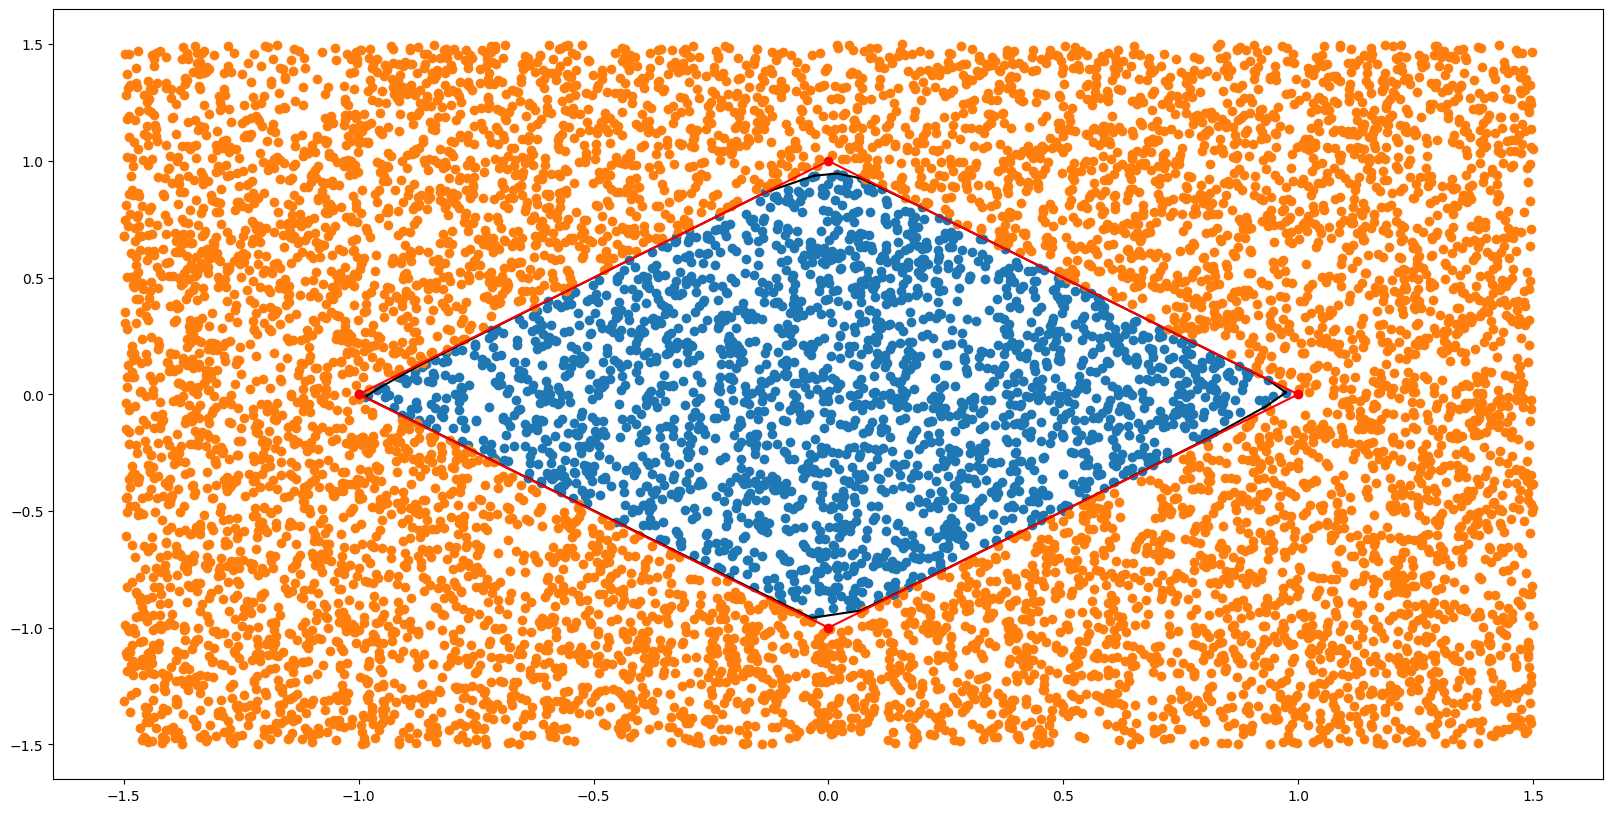

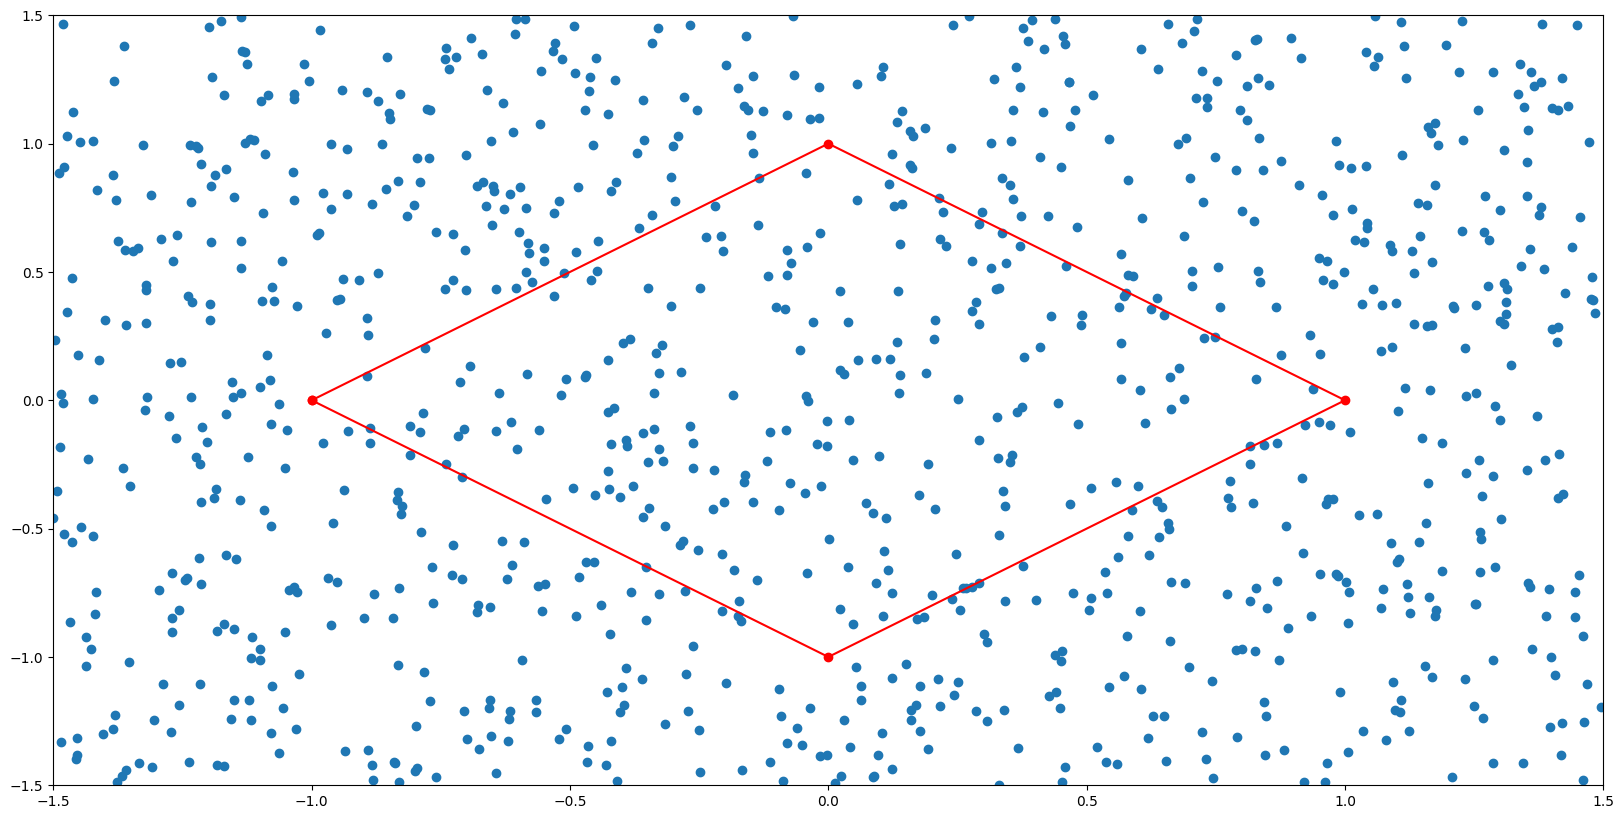

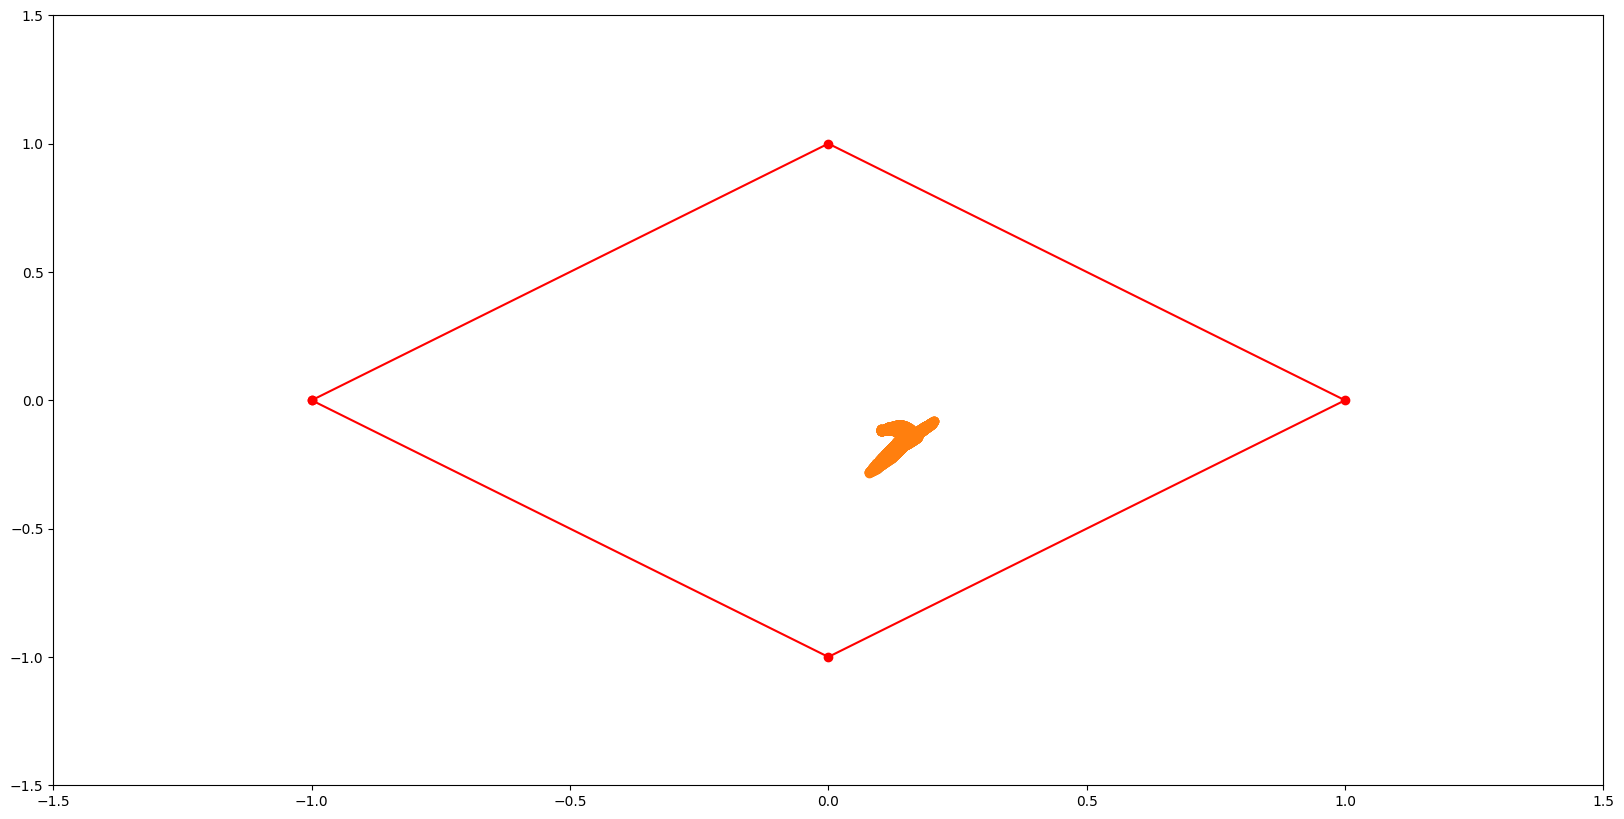

In [13]:
plots = Plots_for(0, icnn, included_space, ambient_space, true_extremal_points, x_range, y_range, adversarial=adversarial, adversarial_values=value)
plots.plt_initial()

plots.plt_adversarial_initial()
plots.plt_adversarial_dotted()


=== Epoch: 0===
batch = 0, mean loss = 1.4171531928564869
batch = 100, mean loss = 1.365878040358081
batch = 200, mean loss = 1.3549306938091032
batch = 300, mean loss = 1.3199392551640332
batch = 400, mean loss = 1.287829467398073
batch = 500, mean loss = 1.2539200948932365
batch = 600, mean loss = 1.213945277816924
batch = 700, mean loss = 1.1883961612503855
batch = 800, mean loss = 1.1590467741388
batch = 900, mean loss = 1.1324622250512701
batch = 1000, mean loss = 1.1100454872849144
batch = 1100, mean loss = 1.0836683933419042
batch = 1200, mean loss = 1.0612639577998568
batch = 1300, mean loss = 1.0400533835699686
batch = 1400, mean loss = 1.01609386445989
batch = 1500, mean loss = 0.9960160431151315
batch = 1600, mean loss = 0.9771550412745901
batch = 1700, mean loss = 0.9555216827455539
batch = 1800, mean loss = 0.9369773385284959
batch = 1900, mean loss = 0.9183213387618583
batch = 2000, mean loss = 0.903292543493315
batch = 2100, mean loss = 0.8869958385236906
batch = 2198, m

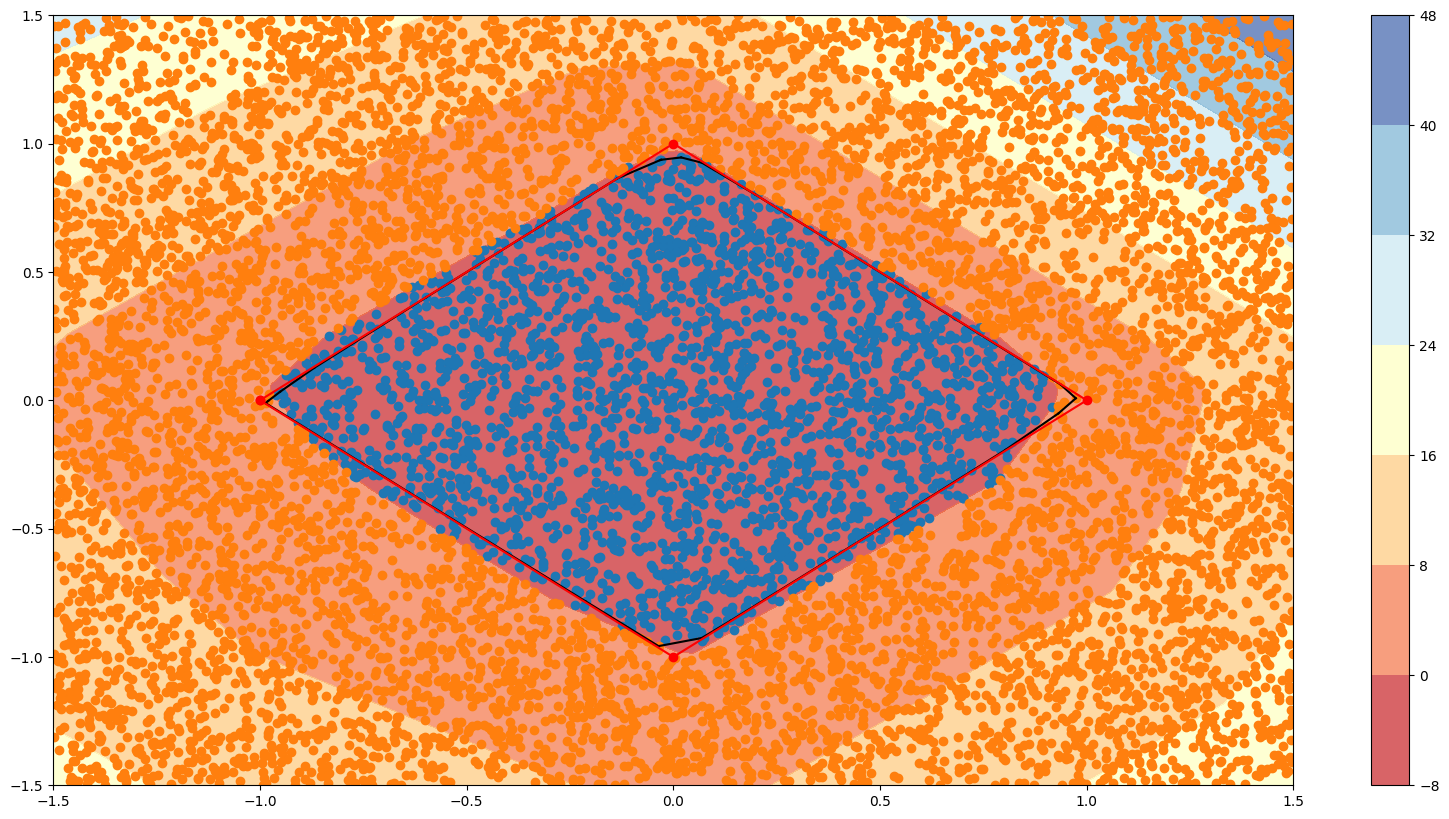

In [14]:
history = train_icnn(icnn, train_loader, ambient_loader, epochs=epochs, hyper_lambda=hyper_lambda)
plots.plt_mesh()

In [15]:
history = train_icnn_adversarial(icnn, adversarial, train_loader, adversarial_loader, epochs=epochs, train_ICNN=False, hyper_lambda=hyper_lambda)

=== Epoch: 0===
batch = 0, mean loss = 3.665186509115887, l_pos = 0.01855988945912683, l_neg = 3.6198396481685493, l_gen = 0.026786971488210926
batch = 100, mean loss = 3.5332739269026896, l_pos = 0.08791937438352135, l_neg = 3.41175800140016, l_gen = 0.0335965511190067
batch = 200, mean loss = 2.5172497695351526, l_pos = 0.08379710826590502, l_neg = 2.085351540877044, l_gen = 0.34810112039220087
batch = 300, mean loss = 2.0454759067513537, l_pos = 0.08699325517628871, l_neg = 1.4064916809811112, l_gen = 0.5519909705939526
batch = 400, mean loss = 1.8036877384064391, l_pos = 0.08386447788932008, l_neg = 1.0614792442950605, l_gen = 0.6583440162220578
batch = 500, mean loss = 1.6652278198843515, l_pos = 0.08897042663724933, l_neg = 0.8529527699298091, l_gen = 0.7233046233172936
batch = 600, mean loss = 1.5683934709862233, l_pos = 0.08790895619426638, l_neg = 0.7131702307701054, l_gen = 0.7673142840218518
batch = 700, mean loss = 1.5011474982386244, l_pos = 0.08909320764888914, l_neg = 0.

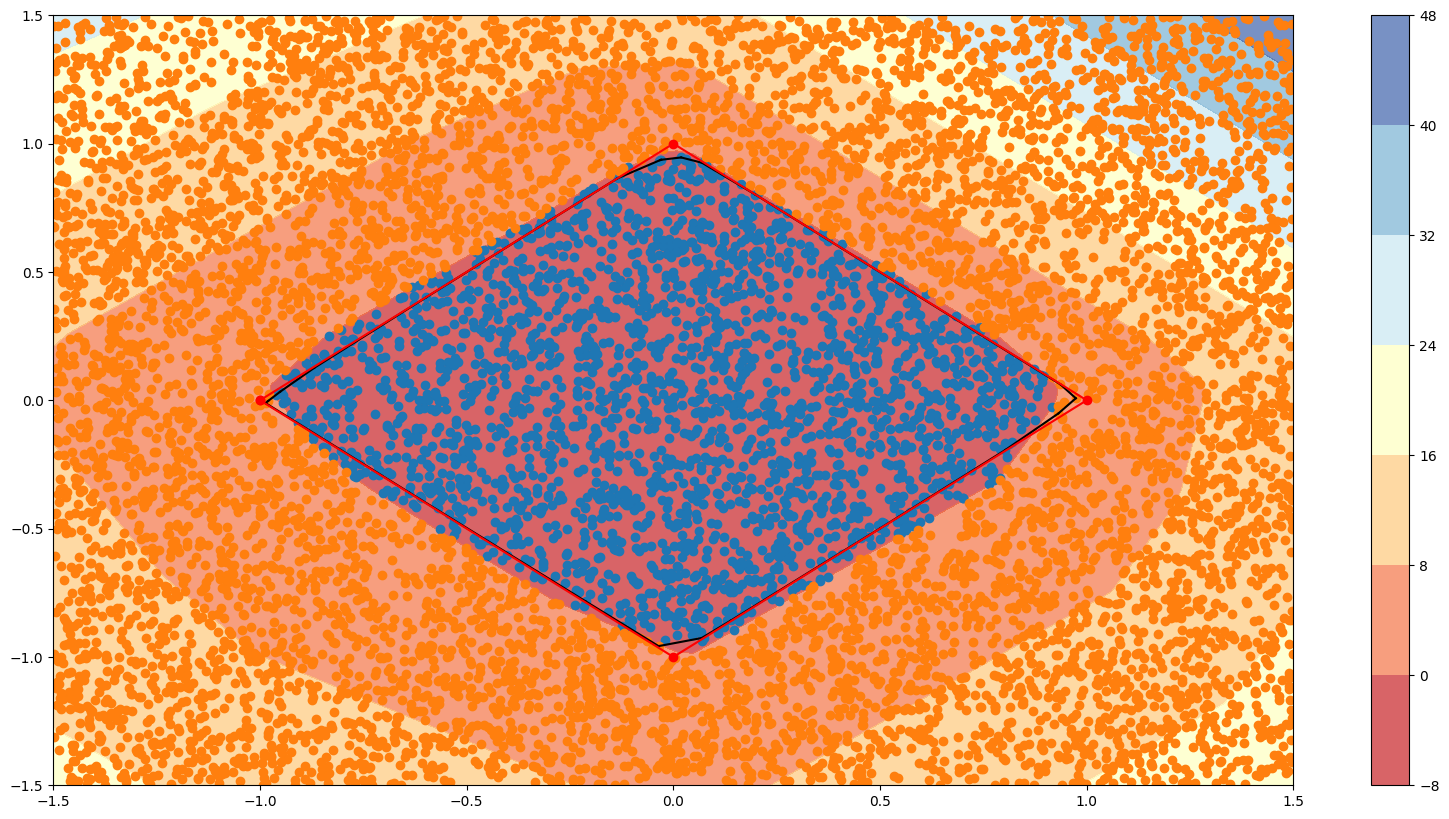

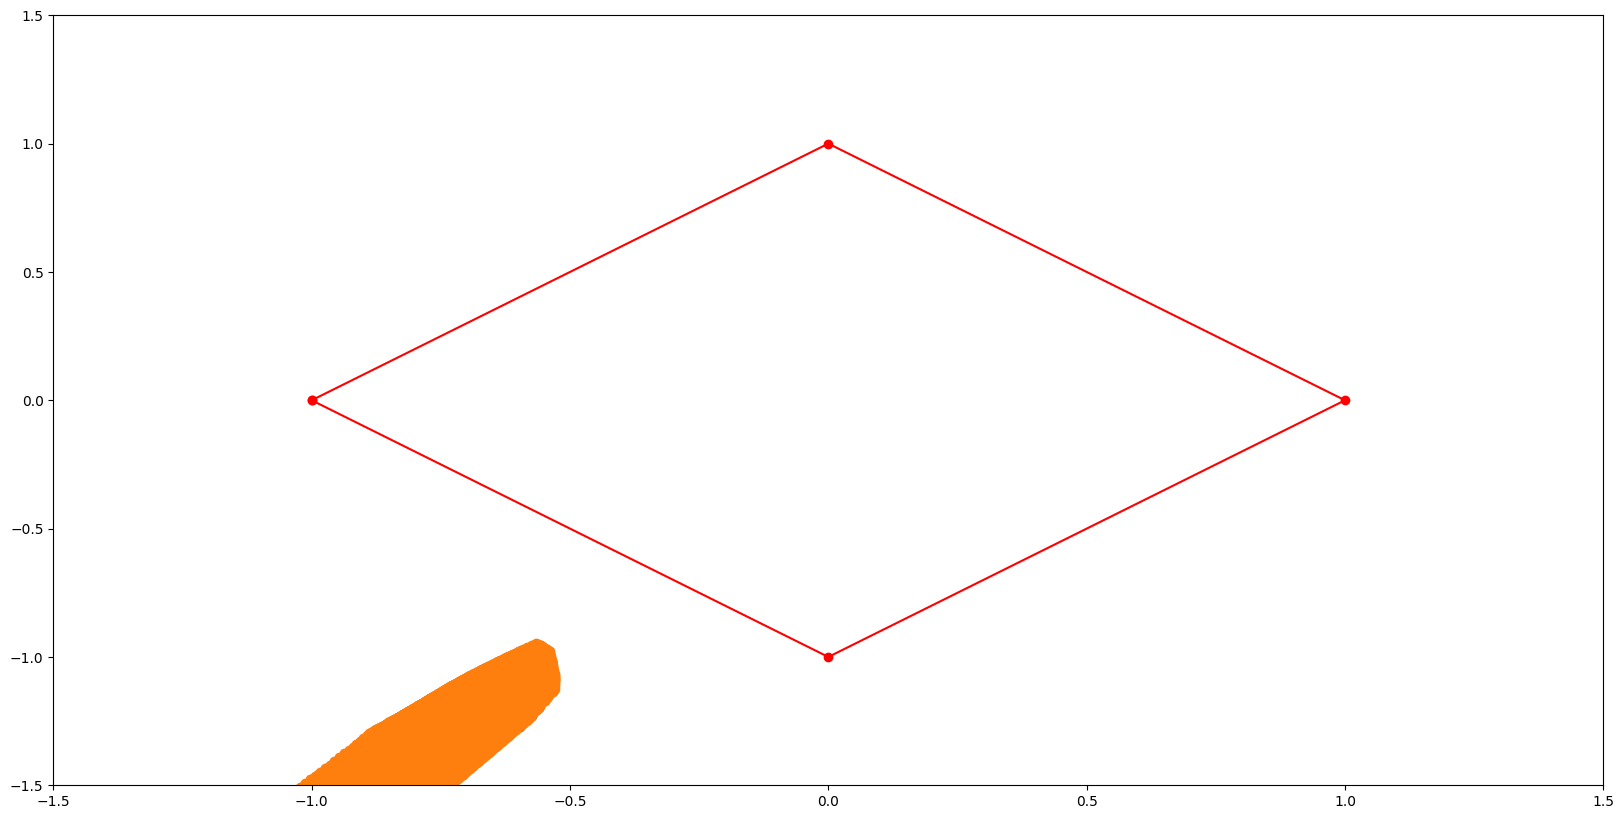

In [16]:
plots.plt_mesh()
plots.plt_adversarial_dotted()